In [1]:
# -*- coding: utf-8 -*-
import os
import netCDF4
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.io.img_tiles import StamenTerrain
from matplotlib.image import imread

import matplotlib.patches as mpatches

import matplotlib as mpl
from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection
from matplotlib.path import Path
import matplotlib.path as mpath
import matplotlib.patches as patches
from matplotlib.image import imread
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.animation import FuncAnimation
import datetime
from matplotlib import colors

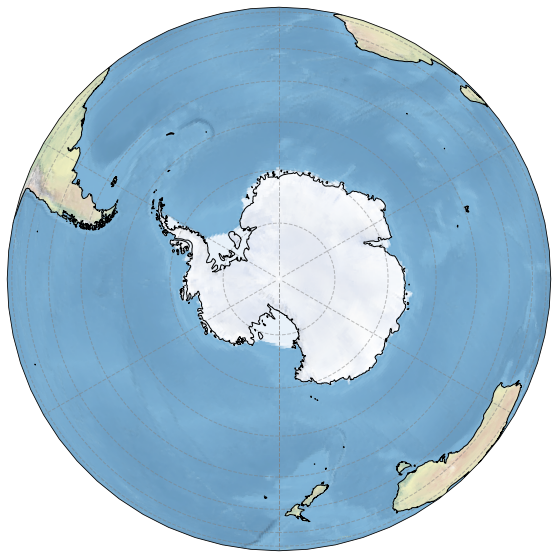

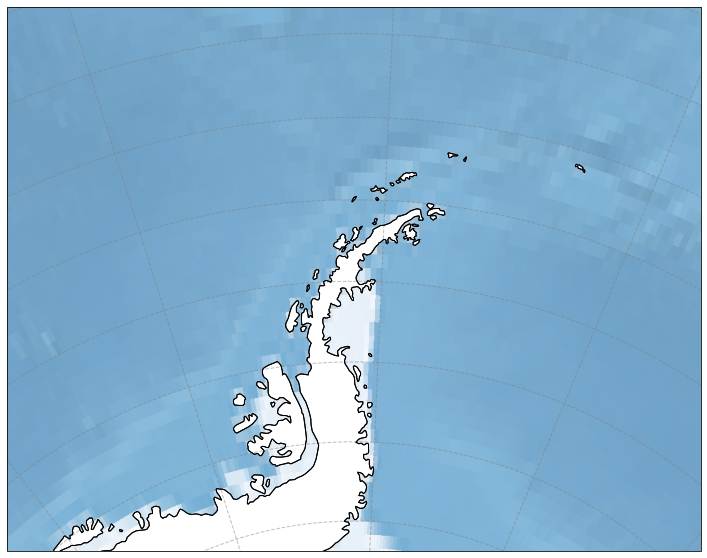

In [2]:
#==============================================================================
# Plot Map
#==============================================================================
##Create figure and projection
fig = plt.figure(figsize=[20,10])
ax1 = plt.subplot(1,1,1, projection=ccrs.NearsidePerspective(central_longitude=0, central_latitude=-90, satellite_height=31000000))

#Add features
ax1.stock_img()
ax1.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
#land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='none')
#ax1.add_feature(land_50m, edgecolor='k')
ax1.coastlines(resolution='50m', color='black', linewidth=1, zorder=200)
#ax1.coastlines(zorder=200)

#Plot data
#ax1.plot(lons, lat0_Jan, ':', linewidth=2, color='k', transform=ccrs.PlateCarree(), alpha=0.7, label='Jan')
#ax1.plot(lons, lat0_Jul, ':', linewidth=2, color='k', transform=ccrs.PlateCarree(), alpha=0.7, label='Jul')
#ax1.plot(lons, lat0_ANN_mean, '-', linewidth=2, color='k', transform=ccrs.PlateCarree(), alpha=0.7)

#==============================================================================
# Plot Map
#==============================================================================
##Create figure and projection
fig = plt.figure(figsize=[20,10])
ax1 = plt.subplot(1,1,1, projection=ccrs.SouthPolarStereo(central_longitude=-62.5, true_scale_latitude=None))
ax1.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())

#Add features
ax1.stock_img()
ax1.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='w')
ax1.add_feature(land_50m, edgecolor='k')
ax1.coastlines(resolution='50m', color='black', linewidth=1, zorder=200)
#ax1.coastlines(zorder=200)

#Plot data
#ax1.plot(lons, lat0_Jan, ':', linewidth=2, color='k', transform=ccrs.PlateCarree(), alpha=0.7, label='Jan')
#ax1.plot(lons, lat0_Jul, ':', linewidth=2, color='k', transform=ccrs.PlateCarree(), alpha=0.7, label='Jul')
#ax1.plot(lons, lat0_ANN_mean, '-', linewidth=2, color='k', transform=ccrs.PlateCarree(), alpha=0.7)

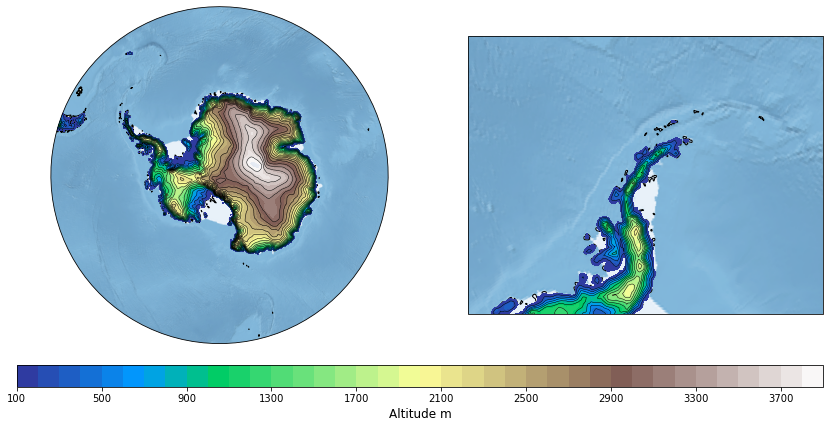

In [3]:
#################
# Plot map Antarctic Peninsula t20 iso0
#################
#Map parameters
fig = plt.figure(figsize=[14,6])

#Map
projection1 = ccrs.SouthPolarStereo(central_longitude=0)
projection2 = ccrs.SouthPolarStereo(central_longitude=-62.5, true_scale_latitude=None)

ax1 = plt.subplot(1,2,1,projection=projection1)
ax2 = plt.subplot(1,2,2,projection=projection2)

#Set circle boundary
theta=np.linspace(0, 2*np.pi, 100)
center, radius = [0.5,0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts*radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)

ax1.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax2.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())

#ax1.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False, linewidth=.5, color='k', alpha=1, linestyle='-')
#ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=.5, color='k', alpha=1, linestyle='-')

ax1.coastlines(resolution='50m')
ax2.coastlines(resolution='50m')

#Background
ax1.imshow(imread('D:\\Mega\\UBUNTU\\Jupyter\\Cartopy_Background_image\\natural-earth-1_large2048px.png'), origin='upper', transform=ccrs.PlateCarree(), extent=[-180,180,-90,90])
ax2.imshow(imread('D:\\Mega\\UBUNTU\\Jupyter\\Cartopy_Background_image\\natural-earth-1_large2048px.png'), origin='upper', transform=ccrs.PlateCarree(), extent=[-180,180,-90,90])




## Load Data
#Path
os.chdir('D:\\MEGA\\UBUNTU\\Jupyter\\MICROAIRPOLAR\\2021_Windsled2019')
filename_geo = 'ERA5_Windsled_geopotential_bigarea.nc'

#Load netcdf
ncdf_geo = netCDF4.Dataset(filename_geo)

#Get dimension
lons = ncdf_geo.variables['longitude'][:]
lats = ncdf_geo.variables['latitude'][:]
z = ncdf_geo.variables['z'][0,:,:]/10

#Plot ERA5
CS0 = ax1.contourf(lons, lats, z, np.arange(100,4000,100), cmap='terrain', transform=ccrs.PlateCarree())
CS1 = ax1.contour(lons, lats, z, np.arange(200,4000,200), colors='k', linewidths=.5, transform=ccrs.PlateCarree())

CS0 = ax2.contourf(lons, lats, z, np.arange(100,4000,100), cmap='terrain', transform=ccrs.PlateCarree())
CS1 = ax2.contour(lons, lats, z, np.arange(200,4000,200), colors='k', linewidths=.5, transform=ccrs.PlateCarree())

#Set Parameters
fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_axes([0.1, 0.0, 0.8, 0.05])
#fig.colorbar(im, cax=cbar_ax)

#ax.clabel(CS1, inline=True, fontsize=12, fmt='%1.0f')
cb = fig.colorbar(CS0, orientation='horizontal', cax=cbar_ax)
cb.set_label('Altitude m', rotation=0, fontsize=12)

#Saveplot
#plt.savefig('GEO3_WS.png', dpi=300)
#plt.close()
plt.show()



Text(0.02, 0.93, 'd')

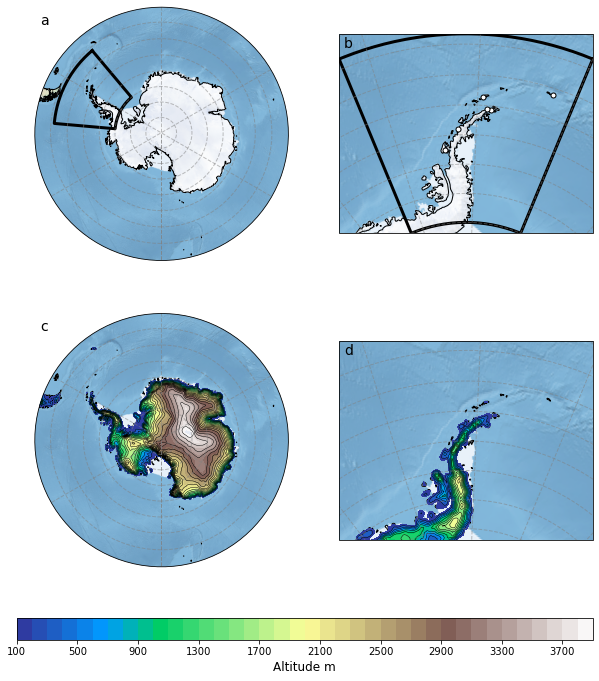

In [4]:
#################
# Plot map Antarctic Peninsula t20 iso0
#################
#Map parameters
fig = plt.figure(figsize=[10,10])

#Map
projection1 = ccrs.SouthPolarStereo(central_longitude=0)
projection2 = ccrs.SouthPolarStereo(central_longitude=-62.5, true_scale_latitude=None)

ax1 = plt.subplot(2,2,1,projection=projection1)
ax2 = plt.subplot(2,2,2,projection=projection2)
ax3 = plt.subplot(2,2,3,projection=projection1)
ax4 = plt.subplot(2,2,4,projection=projection2)

#Set circle boundary
theta=np.linspace(0, 2*np.pi, 100)
center, radius = [0.5,0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts*radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)
ax3.set_boundary(circle, transform=ax3.transAxes)

ax1.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax2.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())
ax3.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax4.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())

#ax1.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False, linewidth=.5, color='k', alpha=1, linestyle='-')
#ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=.5, color='k', alpha=1, linestyle='-')
ax1.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax2.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax3.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax4.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax1.coastlines(resolution='50m')
ax2.coastlines(resolution='50m')
ax3.coastlines(resolution='50m')
ax4.coastlines(resolution='50m')

#Background
ax1.imshow(imread('D:\\Mega\\UBUNTU\\Jupyter\\Cartopy_Background_image\\natural-earth-1_large2048px.png'), origin='upper', transform=ccrs.PlateCarree(), extent=[-180,180,-90,90])
ax2.imshow(imread('D:\\Mega\\UBUNTU\\Jupyter\\Cartopy_Background_image\\natural-earth-1_large2048px.png'), origin='upper', transform=ccrs.PlateCarree(), extent=[-180,180,-90,90])
ax3.imshow(imread('D:\\Mega\\UBUNTU\\Jupyter\\Cartopy_Background_image\\natural-earth-1_large2048px.png'), origin='upper', transform=ccrs.PlateCarree(), extent=[-180,180,-90,90])
ax4.imshow(imread('D:\\Mega\\UBUNTU\\Jupyter\\Cartopy_Background_image\\natural-earth-1_large2048px.png'), origin='upper', transform=ccrs.PlateCarree(), extent=[-180,180,-90,90])

#Area selected
rec_lons = [-40, -85]
rec_lats = [-56, -75]
rec_lons_array = np.concatenate([np.linspace(rec_lons[0], rec_lons[1], 50), np.linspace(rec_lons[1], rec_lons[1], 50), np.linspace(rec_lons[1], rec_lons[0], 50), np.linspace(rec_lons[0], rec_lons[0], 50)])
rec_lats_array = np.concatenate([np.linspace(rec_lats[0], rec_lats[0], 50), np.linspace(rec_lats[0], rec_lats[1], 50), np.linspace(rec_lats[1], rec_lats[1], 50), np.linspace(rec_lats[1], rec_lats[0], 50)])
ax1.plot(rec_lons_array, rec_lats_array, '-', color='k', linewidth=3, transform=ccrs.PlateCarree())
ax2.plot(rec_lons_array, rec_lats_array, '-', color='k', linewidth=3, transform=ccrs.PlateCarree())

#rec_lons = [-55, -70]
#rec_lats = [-56, -75]
#rec_lons_array = np.concatenate([np.linspace(rec_lons[0], rec_lons[1], 50), np.linspace(rec_lons[1], rec_lons[1], 50), np.linspace(rec_lons[1], rec_lons[0], 50), np.linspace(rec_lons[0], rec_lons[0], 50)])
#rec_lats_array = np.concatenate([np.linspace(rec_lats[0], rec_lats[0], 50), np.linspace(rec_lats[0], rec_lats[1], 50), np.linspace(rec_lats[1], rec_lats[1], 50), np.linspace(rec_lats[1], rec_lats[0], 50)])
#ax2.plot(rec_lons_array, rec_lats_array, '-', color='k', linewidth=1.5, transform=ccrs.PlateCarree())

#Stations
transform = ccrs.PlateCarree()._as_mpl_transform(ax2)
ax2.plot(-44.7, -60.7,'o', color='white', markersize=5, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree())
#ax2.annotate('Orcadas', color='r', xy=(-44.7, -60.7), xycoords=transform, fontsize=12, transform=ccrs.PlateCarree())
ax2.plot(-58.9, -62.2,'o', color='white', markersize=5, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree())
ax2.plot(-57.0, -63.4,'o', color='white', markersize=5, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree())
ax2.plot(-57.9, -63.3,'o', color='white', markersize=5, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree())
ax2.plot(-64.4, -65.4,'o', color='white', markersize=5, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree())
ax2.plot(-68.1, -67.5,'o', color='white', markersize=5, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree())

## Load Data
#Path
os.chdir('D:\\MEGA\\UBUNTU\\Jupyter\\MICROAIRPOLAR\\2021_Windsled2019')
filename_geo = 'ERA5_Windsled_geopotential_bigarea.nc'

#Load netcdf
ncdf_geo = netCDF4.Dataset(filename_geo)

#Get dimension
lons = ncdf_geo.variables['longitude'][:]
lats = ncdf_geo.variables['latitude'][:]
z = ncdf_geo.variables['z'][0,:,:]/10

#Plot ERA5
CS0 = ax3.contourf(lons, lats, z, np.arange(100,4000,100), cmap='terrain', transform=ccrs.PlateCarree())
CS1 = ax3.contour(lons, lats, z, np.arange(200,4000,200), colors='k', linewidths=.5, transform=ccrs.PlateCarree())

CS0 = ax4.contourf(lons, lats, z, np.arange(100,4000,100), cmap='terrain', transform=ccrs.PlateCarree())
CS1 = ax4.contour(lons, lats, z, np.arange(200,4000,200), colors='k', linewidths=.5, transform=ccrs.PlateCarree())

#Set Parameters
fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_axes([0.1, 0.0, 0.8, 0.03])
#fig.colorbar(im, cax=cbar_ax)

#ax.clabel(CS1, inline=True, fontsize=12, fmt='%1.0f')
cb = fig.colorbar(CS0, orientation='horizontal', cax=cbar_ax)
cb.set_label('Altitude m', rotation=0, fontsize=12)


ax1.annotate('a', xy=(0.02, 0.93), xycoords='axes fraction', fontsize=14)
ax2.annotate('b', xy=(0.02, 0.93), xycoords='axes fraction', fontsize=14)
ax3.annotate('c', xy=(0.02, 0.93), xycoords='axes fraction', fontsize=14)
ax4.annotate('d', xy=(0.02, 0.93), xycoords='axes fraction', fontsize=14)